## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [4]:
import os
import keras
from sklearn import preprocessing

# 請嘗試設定 GPU：os.environ


In [25]:
train, test = keras.datasets.cifar10.load_data()

In [26]:
## 資料前處理
"""
Your code here
"""
MMS = preprocessing.MinMaxScaler(feature_range=(-1,1))
def preproc_x(x,flatten=True):
    if flatten:
        x = x.reshape((len(x),-1))
    x = MMS.fit_transform(x)
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y,num_classes)
    return y

In [27]:
x_train, y_train = train
x_test, y_test = test

In [28]:
x_train[0][:]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [29]:
# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [32]:
print(x_train.shape)
x_train

(50000, 3072)


array([[-0.5372549 , -0.51372549, -0.50588235, ..., -0.03529412,
        -0.27843137, -0.43529412],
       [ 0.20784314,  0.38823529,  0.46666667, ...,  0.12156863,
         0.04313725,  0.12941176],
       [ 1.        ,  1.        ,  1.        , ..., -0.37254902,
        -0.3254902 , -0.34117647],
       ...,
       [-0.7254902 ,  0.39607843,  0.84313725, ..., -0.90588235,
        -0.75686275, -0.60784314],
       [ 0.48235294,  0.65490196,  0.88235294, ...,  0.52941176,
         0.49019608,  0.34117647],
       [ 0.79607843,  0.79607843,  0.8745098 , ...,  0.27843137,
         0.27843137,  0.2627451 ]])

In [33]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[3072,1024,512,256,128,64,32,16]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n, activation="relu", name="H_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n, activation="relu", name="H_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer],outputs=[out])
    return model

In [35]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
H_layer1 (Dense)             (None, 3072)              9440256   
_________________________________________________________________
H_layer2 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
H_layer3 (Dense)             (None, 512)               524800    
_________________________________________________________________
H_layer4 (Dense)             (None, 256)               131328    
_________________________________________________________________
H_layer5 (Dense)             (None, 128)               32896     
_________________________________________________________________
H_layer6 (Dense)             (None, 64)                8256      
__________

In [36]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [37]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [38]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 10s 194us/step - loss: 2.0459 - acc: 0.2632 - val_loss: 1.8255 - val_acc: 0.3675
Epoch 2/100
50000/50000 [==============================] - 8s 159us/step - loss: 1.6868 - acc: 0.4116 - val_loss: 1.5807 - val_acc: 0.4432
Epoch 3/100
50000/50000 [==============================] - 8s 157us/step - loss: 1.4968 - acc: 0.4774 - val_loss: 1.5029 - val_acc: 0.4759
Epoch 4/100
50000/50000 [==============================] - 8s 158us/step - loss: 1.3818 - acc: 0.5175 - val_loss: 1.4342 - val_acc: 0.5034
Epoch 5/100
50000/50000 [==============================] - 8s 158us/step - loss: 1.2846 - acc: 0.5511 - val_loss: 1.3966 - val_acc: 0.5222
Epoch 6/100
50000/50000 [==============================] - 8s 158us/step - loss: 1.1905 - acc: 0.5835 - val_loss: 1.3844 - val_acc: 0.5285
Epoch 7/100
50000/50

50000/50000 [==============================] - 8s 160us/step - loss: 0.0809 - acc: 0.9753 - val_loss: 3.1775 - val_acc: 0.5460
Epoch 56/100
50000/50000 [==============================] - 8s 162us/step - loss: 0.0719 - acc: 0.9785 - val_loss: 3.0827 - val_acc: 0.5521
Epoch 57/100
50000/50000 [==============================] - 8s 160us/step - loss: 0.0741 - acc: 0.9773 - val_loss: 3.0999 - val_acc: 0.5467
Epoch 58/100
50000/50000 [==============================] - 8s 168us/step - loss: 0.0765 - acc: 0.9773 - val_loss: 3.0677 - val_acc: 0.5442
Epoch 59/100
50000/50000 [==============================] - 8s 158us/step - loss: 0.0635 - acc: 0.9801 - val_loss: 3.1921 - val_acc: 0.5499
Epoch 60/100
50000/50000 [==============================] - 8s 157us/step - loss: 0.0630 - acc: 0.9807 - val_loss: 3.1957 - val_acc: 0.5410
Epoch 61/100
50000/50000 [==============================] - 8s 158us/step - loss: 0.0695 - acc: 0.9797 - val_loss: 3.1384 - val_acc: 0.5508
Epoch 62/100
50000/50000 [=======

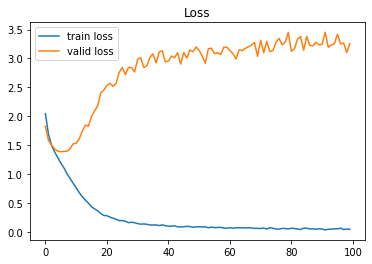

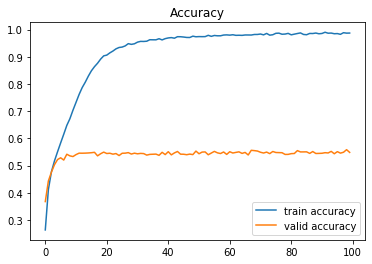

In [40]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()